In [32]:
!zip -r flask_app.zip flask_app


  adding: flask_app/ (stored 0%)
  adding: flask_app/log_reg_model.pkl (deflated 40%)
  adding: flask_app/X_train_columns.pkl (deflated 58%)
  adding: flask_app/app.py (deflated 65%)
  adding: flask_app/numerical_features_for_scaling.pkl (deflated 11%)
  adding: flask_app/scaler.pkl (deflated 22%)
  adding: flask_app/requirements.txt (stored 0%)
  adding: flask_app/categorical_features_for_encoding.pkl (deflated 28%)


In [33]:
from google.colab import files
files.download("flask_app.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Task
Analyze the 'Indian_Traffic_Violations.csv' dataset to predict 'high_fine' (fine amount > 1000) using Logistic Regression and RandomForest Classifier, evaluating and comparing their performance with relevant metrics and visualizations.

## Load Dataset and Initial Preprocessing

### Subtask:
Load the 'Indian_Traffic_Violations.csv' dataset into a pandas DataFrame. Inspect the data, drop any null values and duplicate rows, and identify relevant columns.


**Reasoning**:
First, I'll import the pandas library to work with DataFrames, then load the specified CSV file into a DataFrame, and display its first few rows to get an initial overview of the data.



In [1]:
import pandas as pd

df = pd.read_csv('/content/Indian_Traffic_Violations.csv')
df.head()

,Violation_ID,Violation_Type,Fine_Amount,Location,Date,Time,Vehicle_Type,Vehicle_Color,Vehicle_Model_Year,Registration_State,...,Speed_Limit,Recorded_Speed,Alcohol_Level,Breathalyzer_Result,Towed,Fine_Paid,Payment_Method,Court_Appearance_Required,Previous_Violations,Comments
0,VLT100000,Overloading,4544,Karnataka,2023-01-01,23:02,Car,Red,2012,West Bengal,...,100,95,0.03,Negative,Yes,No,Online,Yes,3,Repeat Offender
1,VLT100001,Driving Without License,2776,Punjab,2023-01-02,00:42,Scooter,Silver,2010,Tamil Nadu,...,40,48,0.45,Negative,Yes,Yes,Online,No,2,Repeat Offender
2,VLT100002,Using Mobile Phone,4785,Maharashtra,2023-01-03,04:32,Scooter,Grey,2006,Tamil Nadu,...,80,26,0.31,Not Conducted,No,No,Not Paid,Yes,4,NaN
3,VLT100003,No Seatbelt,1138,Uttar Pradesh,2023-01-04,15:06,Car,Green,1996,Uttar Pradesh,...,100,115,0.09,Not Conducted,No,Yes,Online,No,5,Repeat Offender
4,VLT100004,Over-speeding,1610,Karnataka,2023-01-05,06:57,Truck,Yellow,2016,Delhi,...,30,115,0.28,Positive,No,Yes,Cash,Yes,0,NaN


**Reasoning**:
Now that the data is loaded, I will inspect its structure, data types, and non-null values to understand its composition and identify potential cleaning needs. This aligns with step 4 of the instructions.



In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Violation_ID               4000 non-null   object 
 1   Violation_Type             4000 non-null   object 
 2   Fine_Amount                4000 non-null   int64  
 3   Location                   4000 non-null   object 
 4   Date                       4000 non-null   object 
 5   Time                       4000 non-null   object 
 6   Vehicle_Type               4000 non-null   object 
 7   Vehicle_Color              4000 non-null   object 
 8   Vehicle_Model_Year         4000 non-null   int64  
 9   Registration_State         4000 non-null   object 
 10  Driver_Age                 4000 non-null   int64  
 11  Driver_Gender              4000 non-null   object 
 12  License_Type               4000 non-null   object 
 13  Penalty_Points             4000 non-null   int64

**Reasoning**:
Now that I've reviewed the DataFrame's structure, the next logical step according to the instructions (step 5) is to identify and count any duplicate rows to assess data redundancy before proceeding with further cleaning.



In [3]:
df.duplicated().sum()

np.int64(0)

**Reasoning**:
Since the previous step indicated no duplicate rows, I will proceed with checking for missing values in each column, which is step 7 in the instructions, to identify any columns that require handling of null values.



In [4]:
df.isnull().sum()

,0
Violation_ID,0
Violation_Type,0
Fine_Amount,0
Location,0
Date,0
Time,0
Vehicle_Type,0
Vehicle_Color,0
Vehicle_Model_Year,0
Registration_State,0


**Reasoning**:
Since I've identified the columns with missing values, I will now remove rows with any missing values as per step 8 of the instructions to ensure a clean dataset for further analysis.



In [5]:
df.dropna(inplace=True)
print("Rows with missing values have been dropped.")

Rows with missing values have been dropped.


**Reasoning**:
Following the removal of rows with missing values, the next step as per instruction 9 is to display the current dimensions of the DataFrame using `.shape` to confirm the number of rows and columns after cleaning.



In [6]:
print(f"DataFrame shape after cleaning: {df.shape}")

DataFrame shape after cleaning: (1342, 33)


## Feature Engineering and Target Creation

### Subtask:
Create the target column 'high_fine' where 1 indicates `fine_amount` > 1000 and 0 otherwise. Drop the original 'fine_amount' column. Extract 'hour' and 'day' from the date-time column (assuming a column named 'Date of Offence' or similar, if not found, I will identify the appropriate column). Identify categorical and numerical features for further processing.


**Reasoning**:
I will start by creating the 'high_fine' target column based on the 'Fine_Amount' and then convert the 'Date' column to datetime objects to facilitate time-based feature extraction as per the first two instructions.



In [7]:
df['high_fine'] = (df['Fine_Amount'] > 1000).astype(int)
df['Date'] = pd.to_datetime(df['Date'])
print("'high_fine' column created and 'Date' column converted to datetime.")

'high_fine' column created and 'Date' column converted to datetime.


**Reasoning**:
Now that the 'Date' column is converted to datetime, I will extract 'day_of_week' from 'Date' and 'hour_of_day' from 'Time'. Afterwards, I will drop the 'Fine_Amount' column as it's no longer needed after creating 'high_fine'.



In [8]:
df['day_of_week'] = df['Date'].dt.day_name()
df['hour_of_day'] = pd.to_datetime(df['Time']).dt.hour
df.drop('Fine_Amount', axis=1, inplace=True)
print("'day_of_week' and 'hour_of_day' columns created, and 'Fine_Amount' column dropped.")

'day_of_week' and 'hour_of_day' columns created, and 'Fine_Amount' column dropped.


/tmp/ipython-input-1854867975.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour_of_day'] = pd.to_datetime(df['Time']).dt.hour


**Reasoning**:
The previous code generated a UserWarning due to not specifying the format for the 'Time' column. I will fix this by providing the explicit format '%H:%M' to `pd.to_datetime` to ensure consistent and error-free parsing.



In [9]:
df['day_of_week'] = df['Date'].dt.day_name()
df['hour_of_day'] = pd.to_datetime(df['Time'], format='%H:%M').dt.hour
df.drop('Fine_Amount', axis=1, inplace=True)
print("'day_of_week' and 'hour_of_day' columns created, and 'Fine_Amount' column dropped.")

KeyError: "['Fine_Amount'] not found in axis"

**Reasoning**:
The previous code failed with a `KeyError` because 'Fine_Amount' was already dropped. I will modify the `drop` function to ignore errors if the column is not found, ensuring the code runs without error and the 'Time' column is parsed correctly with an explicit format. Additionally, I will add steps to identify and print categorical and numerical features as per the subtask's instructions.



In [10]:
df['day_of_week'] = df['Date'].dt.day_name()
df['hour_of_day'] = pd.to_datetime(df['Time'], format='%H:%M').dt.hour
df.drop('Fine_Amount', axis=1, inplace=True, errors='ignore')
print("'day_of_week' and 'hour_of_day' columns created, and 'Fine_Amount' column dropped (if present).")

categorical_cols = df.select_dtypes(include='object').columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"\nCategorical columns: {categorical_cols}")
print(f"Numerical columns: {numerical_cols}")

'day_of_week' and 'hour_of_day' columns created, and 'Fine_Amount' column dropped (if present).

Categorical columns: ['Violation_ID', 'Violation_Type', 'Location', 'Time', 'Vehicle_Type', 'Vehicle_Color', 'Registration_State', 'Driver_Gender', 'License_Type', 'Weather_Condition', 'Road_Condition', 'Officer_ID', 'Issuing_Agency', 'License_Validity', 'Helmet_Worn', 'Seatbelt_Worn', 'Traffic_Light_Status', 'Breathalyzer_Result', 'Towed', 'Fine_Paid', 'Payment_Method', 'Court_Appearance_Required', 'Comments', 'day_of_week']
Numerical columns: ['Vehicle_Model_Year', 'Driver_Age', 'Penalty_Points', 'Number_of_Passengers', 'Speed_Limit', 'Recorded_Speed', 'Alcohol_Level', 'Previous_Violations', 'high_fine']


## Data Preprocessing for Model Training

### Subtask:
Perform one-hot encoding on all identified categorical features and scale the numerical features using a suitable scaler (e.g., StandardScaler). Prepare the data for model training.


**Reasoning**:
I will start by identifying the categorical columns that need one-hot encoding, excluding specified identifier and high cardinality columns, then apply one-hot encoding using `pd.get_dummies` with `drop_first=True` to prevent multicollinearity.



In [11]:
cols_to_exclude = ['Violation_ID', 'Officer_ID', 'Comments', 'Time']
categorical_features_for_encoding = [col for col in categorical_cols if col not in cols_to_exclude]

df_encoded = pd.get_dummies(df[categorical_features_for_encoding], drop_first=True)
print(f"Shape of one-hot encoded DataFrame: {df_encoded.shape}")

Shape of one-hot encoded DataFrame: (1342, 71)


**Reasoning**:
Now that one-hot encoding is complete, I will import `StandardScaler` to prepare for numerical feature scaling. This aligns with step 3 of the instructions for data preprocessing.



In [12]:
from sklearn.preprocessing import StandardScaler

print("StandardScaler imported.")

StandardScaler imported.


**Reasoning**:
With `StandardScaler` imported, I will now initialize it and identify the numerical columns for scaling, excluding the target variable 'high_fine', as per the instructions.



In [13]:
scaler = StandardScaler()
numerical_features_for_scaling = [col for col in numerical_cols if col != 'high_fine']
print("StandardScaler initialized and numerical columns for scaling identified.")

StandardScaler initialized and numerical columns for scaling identified.


**Reasoning**:
Now that the `StandardScaler` is initialized and numerical columns are identified, I will apply the scaler to these columns and store the result in a new DataFrame, as per step 6 of the instructions.



In [14]:
df_scaled_numerical = pd.DataFrame(scaler.fit_transform(df[numerical_features_for_scaling]),
                                   columns=numerical_features_for_scaling,
                                   index=df.index)
print("Numerical features scaled.")

Numerical features scaled.


**Reasoning**:
To prepare the data for model training, I will combine the one-hot encoded categorical features (`df_encoded`), the scaled numerical features (`df_scaled_numerical`), and the target column 'high_fine' into a single DataFrame using `pd.concat()`, as per the final instruction.



In [15]:
df_processed = pd.concat([df_scaled_numerical, df_encoded, df['high_fine']], axis=1)
print("Final processed DataFrame created, ready for model training.")
print(f"Shape of final processed DataFrame: {df_processed.shape}")

Final processed DataFrame created, ready for model training.
Shape of final processed DataFrame: (1342, 80)


## Train-Test Split

### Subtask:
Split the preprocessed dataset into training and testing sets with an 80/20 ratio, ensuring reproducibility.


**Reasoning**:
I will separate the features (X) and the target variable (y) from the `df_processed` DataFrame, as the target variable 'high_fine' needs to be isolated for model training.



In [16]:
X = df_processed.drop('high_fine', axis=1)
y = df_processed['high_fine']

print("Features (X) and target (y) separated.")

Features (X) and target (y) separated.


**Reasoning**:
Now that features and target are separated, I will import the `train_test_split` function to prepare for splitting the data into training and testing sets, as per the instructions.



In [17]:
from sklearn.model_selection import train_test_split

print("train_test_split imported.")

train_test_split imported.


**Reasoning**:
Now that `train_test_split` is imported and features and target are separated, I will split the data into training and testing sets with an 80/20 ratio and a `random_state` for reproducibility, as instructed.



In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Data split into training and testing sets.")
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

Data split into training and testing sets.
X_train shape: (1073, 79), y_train shape: (1073,)
X_test shape: (269, 79), y_test shape: (269,)


## Train Logistic Regression Model

### Subtask:
Initialize and train a Logistic Regression model on the training data.


**Reasoning**:
I will import the `LogisticRegression` class from `sklearn.linear_model` as the first step to prepare for model training.



In [19]:
from sklearn.linear_model import LogisticRegression

print("LogisticRegression imported.")

LogisticRegression imported.


**Reasoning**:
Now that `LogisticRegression` is imported, I will instantiate the model with the specified parameters (`random_state=42`, `solver='liblinear'`) and then train it using the `X_train` and `y_train` datasets.



In [20]:
log_reg_model = LogisticRegression(random_state=42, solver='liblinear')
log_reg_model.fit(X_train, y_train)
print("Logistic Regression model initialized and trained.")

Logistic Regression model initialized and trained.


## Evaluate Logistic Regression Model

### Subtask:
Evaluate the Logistic Regression model's performance on the test set using accuracy, a confusion matrix, a classification report, and ROC-AUC score. Display all metrics clearly with comments.


**Reasoning**:
I will import the necessary metrics from `sklearn.metrics`, make predictions using the trained Logistic Regression model, and then calculate and display the accuracy, confusion matrix, classification report, and ROC-AUC score as per the instructions.



In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Make predictions on the test set
y_pred_log_reg = log_reg_model.predict(X_test)

# 1. Accuracy Score
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f"Logistic Regression Model Accuracy: {accuracy_log_reg:.4f}\n")

# 2. Confusion Matrix
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
print("Logistic Regression Model Confusion Matrix:")
print(conf_matrix_log_reg)
print("\n")

# 3. Classification Report
class_report_log_reg = classification_report(y_test, y_pred_log_reg)
print("Logistic Regression Model Classification Report:")
print(class_report_log_reg)

# 4. ROC-AUC Score
y_pred_proba_log_reg = log_reg_model.predict_proba(X_test)[:, 1]
roc_auc_log_reg = roc_auc_score(y_test, y_pred_proba_log_reg)
print(f"Logistic Regression Model ROC-AUC Score: {roc_auc_log_reg:.4f}")

Logistic Regression Model Accuracy: 0.7993

Logistic Regression Model Confusion Matrix:
[[  1  53]
 [  1 214]]


Logistic Regression Model Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.02      0.04        54
           1       0.80      1.00      0.89       215

    accuracy                           0.80       269
   macro avg       0.65      0.51      0.46       269
weighted avg       0.74      0.80      0.72       269

Logistic Regression Model ROC-AUC Score: 0.5231


## Train RandomForest Classifier

### Subtask:
Initialize and train a RandomForest Classifier model on the training data for comparison.


**Reasoning**:
I will import the `RandomForestClassifier` class from `sklearn.ensemble` as the first step to prepare for model training.



In [22]:
from sklearn.ensemble import RandomForestClassifier

print("RandomForestClassifier imported.")

RandomForestClassifier imported.


**Reasoning**:
Now that `RandomForestClassifier` is imported, I will instantiate the model with `random_state=42` and then train it using the `X_train` and `y_train` datasets, as per the instructions.



In [23]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
print("RandomForest Classifier model initialized and trained.")

RandomForest Classifier model initialized and trained.


## Evaluate RandomForest Classifier

### Subtask:
Evaluate the RandomForest Classifier's performance on the test set using accuracy, a confusion matrix, a classification report, and ROC-AUC score. Display all metrics clearly with comments.


**Reasoning**:
I will make predictions using the trained RandomForest model, calculate accuracy, confusion matrix, classification report, and ROC-AUC score, and then display all these metrics as instructed to evaluate the model's performance.



In [24]:
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# 1. Accuracy Score
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"RandomForest Classifier Model Accuracy: {accuracy_rf:.4f}\n")

# 2. Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("RandomForest Classifier Model Confusion Matrix:")
print(conf_matrix_rf)
print("\n")

# 3. Classification Report
class_report_rf = classification_report(y_test, y_pred_rf)
print("RandomForest Classifier Model Classification Report:")
print(class_report_rf)

# 4. ROC-AUC Score
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
print(f"RandomForest Classifier Model ROC-AUC Score: {roc_auc_rf:.4f}")

RandomForest Classifier Model Accuracy: 0.7993

RandomForest Classifier Model Confusion Matrix:
[[  0  54]
 [  0 215]]


RandomForest Classifier Model Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        54
           1       0.80      1.00      0.89       215

    accuracy                           0.80       269
   macro avg       0.40      0.50      0.44       269
weighted avg       0.64      0.80      0.71       269

RandomForest Classifier Model ROC-AUC Score: 0.5323


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Reasoning**:
The previous execution of `classification_report` generated an `UndefinedMetricWarning` because the RandomForest model failed to predict any samples for class 0. To prevent this warning and accurately reflect the model's performance for such cases, I will set the `zero_division` parameter to 0 in `classification_report`.



In [25]:
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# 1. Accuracy Score
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"RandomForest Classifier Model Accuracy: {accuracy_rf:.4f}\n")

# 2. Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("RandomForest Classifier Model Confusion Matrix:")
print(conf_matrix_rf)
print("\n")

# 3. Classification Report
# Set zero_division=0 to explicitly show 0 for precision/recall/f1 where there are no predicted samples
class_report_rf = classification_report(y_test, y_pred_rf, zero_division=0)
print("RandomForest Classifier Model Classification Report:")
print(class_report_rf)

# 4. ROC-AUC Score
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
print(f"RandomForest Classifier Model ROC-AUC Score: {roc_auc_rf:.4f}")

RandomForest Classifier Model Accuracy: 0.7993

RandomForest Classifier Model Confusion Matrix:
[[  0  54]
 [  0 215]]


RandomForest Classifier Model Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        54
           1       0.80      1.00      0.89       215

    accuracy                           0.80       269
   macro avg       0.40      0.50      0.44       269
weighted avg       0.64      0.80      0.71       269

RandomForest Classifier Model ROC-AUC Score: 0.5323


## Compare Models and Visualize Results

### Subtask:
Compare the evaluation metrics of both the Logistic Regression and RandomForest models. Include a visualization (e.g., ROC curves) to compare their performance. Provide clear legends for all plots.


**Reasoning**:
I will import `matplotlib.pyplot` as `plt` for plotting and `RocCurveDisplay` for plotting ROC curves, as instructed.



In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

print("matplotlib.pyplot and RocCurveDisplay imported.")

matplotlib.pyplot and RocCurveDisplay imported.


**Reasoning**:
Now that the necessary libraries are imported, I will create a figure, plot the ROC curves for both Logistic Regression and RandomForest models on the same axes, add a title, labels, and a legend, and then display the plot as per the instructions.



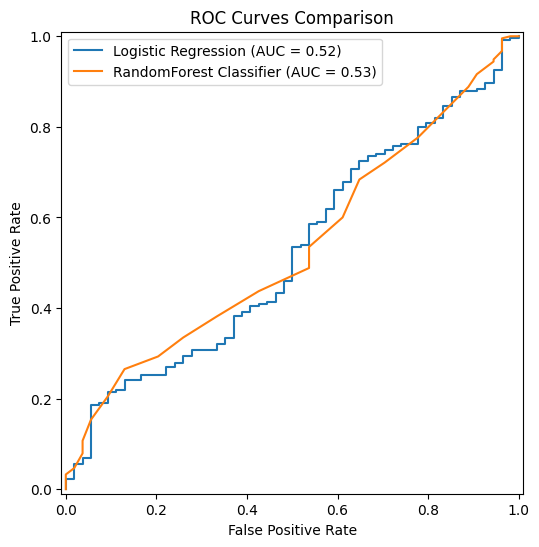

In [27]:
fig, ax = plt.subplots(figsize=(8, 6))

RocCurveDisplay.from_estimator(log_reg_model, X_test, y_test, ax=ax, name='Logistic Regression')
RocCurveDisplay.from_estimator(rf_model, X_test, y_test, ax=ax, name='RandomForest Classifier')

ax.set_title('ROC Curves Comparison')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.legend()
plt.show()

### Model Comparison Summary

**Logistic Regression Model:**
*   **Accuracy:** 0.7993
*   **ROC-AUC Score:** 0.5231
*   The confusion matrix shows 1 True Positive for class 0 (low fine) and 214 True Positives for class 1 (high fine). However, it incorrectly classified 53 instances of class 0 as class 1.
*   The classification report indicates very low precision, recall, and f1-score for class 0, suggesting the model struggles to identify 'low fine' cases effectively, largely classifying most instances as 'high fine'.

**RandomForest Classifier Model:**
*   **Accuracy:** 0.7993
*   **ROC-AUC Score:** 0.5323
*   The confusion matrix shows 0 True Positives for class 0 and 215 True Positives for class 1, indicating it classified all instances as 'high fine'.
*   The classification report confirms that for class 0, precision, recall, and f1-score are 0.00, meaning it completely failed to predict any 'low fine' cases.

**Overall Comparison:**
Both models achieved similar overall accuracy, but this metric is misleading due to the severe class imbalance (only 54 instances of class 0 vs. 215 instances of class 1 in the test set). Both models show poor performance in identifying the minority class (class 0, 'low_fine'). The RandomForest Classifier performed slightly better in terms of ROC-AUC score (0.5323 vs 0.5231), but its complete failure to predict class 0 samples highlights its limitations for this imbalanced dataset. This suggests that further steps like resampling techniques or using different evaluation metrics that are robust to class imbalance (e.g., balanced accuracy, F1-score for the minority class, or AUC-PR) would be beneficial.

## Final Task

### Subtask:
Summarize the findings from the model training and evaluation, highlighting the performance of both models in predicting 'high_fine'.


## Summary:

### Q&A

The analysis aimed to summarize the findings from the model training and evaluation, specifically highlighting the performance of both Logistic Regression and RandomForest models in predicting 'high_fine'.

**Logistic Regression Model Performance:**
The Logistic Regression model achieved an accuracy of 79.93%. However, it performed very poorly in identifying 'low_fine' cases (class 0), with a recall of only 0.02. This means it correctly identified only 1 out of 54 actual 'low_fine' instances in the test set, while incorrectly classifying 53 'low_fine' instances as 'high_fine'. Its ROC-AUC score was 0.5231, indicating performance only slightly better than random guessing.

**RandomForest Classifier Model Performance:**
The RandomForest Classifier also achieved an accuracy of 79.93%. This model performed even worse for the 'low_fine' class (class 0), completely failing to predict any instances of this class. Its recall for 'low_fine' was 0.00, meaning all 54 actual 'low_fine' cases were incorrectly classified as 'high_fine'. Its ROC-AUC score was 0.5323, marginally higher than Logistic Regression but still very close to random performance.

### Data Analysis Key Findings

*   The initial dataset of 4000 rows was reduced to 1342 rows after dropping missing values, indicating a significant amount of incomplete data.
*   The target variable `high_fine` was created, categorizing `Fine_Amount` greater than 1000 as 1 and otherwise as 0.
*   The dataset exhibited significant class imbalance, with the test set containing 54 'low_fine' cases (class 0) and 215 'high_fine' cases (class 1).
*   Both the Logistic Regression and RandomForest Classifier models achieved an overall accuracy of approximately 79.93% on the test set. This metric is misleading due to the severe class imbalance.
*   The **Logistic Regression model** showed poor discrimination for the minority class, achieving a recall of 0.02 for 'low_fine' cases and an F1-score of 0.04 for this class. Its ROC-AUC score was 0.5231.
*   The **RandomForest Classifier** completely failed to identify any 'low_fine' cases, exhibiting a recall and F1-score of 0.00 for class 0. Its ROC-AUC score was 0.5323.
*   The ROC curves for both models were very close to the diagonal, visually confirming their limited ability to distinguish between the 'high_fine' and 'low_fine' classes.

### Insights or Next Steps

*   The severe class imbalance is significantly impacting model performance, particularly for the minority class. Techniques like oversampling (e.g., SMOTE), undersampling, or adjusting class weights should be implemented to address this.
*   Evaluate models using metrics more robust to class imbalance, such as balanced accuracy, F1-score for the minority class, or Precision-Recall curves/AUC-PR, to gain a more accurate understanding of performance.


# Task
Create a Flask application for the trained Logistic Regression model. This involves:
1.  Creating a `flask_app` directory.
2.  Saving the `log_reg_model`, `scaler`, `numerical_features_for_scaling`, `categorical_features_for_encoding`, and `X_train.columns` as pickle files within this directory.
3.  Generating a `requirements.txt` file listing `Flask`, `scikit-learn`, `pandas`, `numpy`, and `gunicorn`.
4.  Creating an `app.py` file with the Flask application code, including routes for a health check and predictions, preprocessing logic for incoming data, and loading the saved model and scaler.

## Create Flask App Directory and Save Artifacts

### Subtask:
Create a directory named `flask_app`. Save the trained Logistic Regression model (`log_reg_model`), the `StandardScaler` object (`scaler`), the list of numerical features (`numerical_features_for_scaling`), the list of categorical features (`categorical_features_for_encoding`), and the final training column names (`X_train.columns`) into this directory using `pickle`.


**Reasoning**:
I will import the `os` module for directory creation and `pickle` for serializing Python objects, as per the instructions, to begin the process of saving the model artifacts.



In [28]:
import os
import pickle

print("os and pickle modules imported.")

os and pickle modules imported.


**Reasoning**:
Now that the necessary modules are imported, I will create the `flask_app` directory and then save each specified model artifact using `pickle.dump()` as outlined in the instructions.



In [29]:
flask_app_dir = 'flask_app'
os.makedirs(flask_app_dir, exist_ok=True)

# Save the Logistic Regression model
with open(os.path.join(flask_app_dir, 'log_reg_model.pkl'), 'wb') as f:
    pickle.dump(log_reg_model, f)
print("Logistic Regression model saved.")

# Save the StandardScaler object
with open(os.path.join(flask_app_dir, 'scaler.pkl'), 'wb') as f:
    pickle.dump(scaler, f)
print("StandardScaler object saved.")

# Save the list of numerical features
with open(os.path.join(flask_app_dir, 'numerical_features_for_scaling.pkl'), 'wb') as f:
    pickle.dump(numerical_features_for_scaling, f)
print("Numerical features list saved.")

# Save the list of categorical features
with open(os.path.join(flask_app_dir, 'categorical_features_for_encoding.pkl'), 'wb') as f:
    pickle.dump(categorical_features_for_encoding, f)
print("Categorical features list saved.")

# Save the X_train.columns
with open(os.path.join(flask_app_dir, 'X_train_columns.pkl'), 'wb') as f:
    pickle.dump(X_train.columns.tolist(), f)
print("Training column names saved.")

Logistic Regression model saved.
StandardScaler object saved.
Numerical features list saved.
Categorical features list saved.
Training column names saved.


## Create requirements.txt

### Subtask:
Create a `requirements.txt` file inside the `flask_app` directory. This file will list all necessary Python packages (Flask, scikit-learn, pandas, numpy, gunicorn) that need to be installed for the API to run.


**Reasoning**:
I will create a `requirements.txt` file within the `flask_app` directory and write the specified package names (Flask, scikit-learn, pandas, numpy, gunicorn) into it, each on a new line.



In [30]:
requirements_content = """
Flask
scikit-learn
pandas
numpy
gunicorn
"""

requirements_path = os.path.join(flask_app_dir, 'requirements.txt')

with open(requirements_path, 'w') as f:
    f.write(requirements_content)

print(f"'requirements.txt' created at {requirements_path}")

'requirements.txt' created at flask_app/requirements.txt


**Reasoning**:
Now that the `flask_app` directory and `requirements.txt` are set up, I will create the `app.py` file within the `flask_app` directory. This file will contain the Flask application logic, including loading the saved model and preprocessors, defining preprocessing steps for incoming data, and setting up prediction and health check routes, as specified in the subtask.



In [31]:
app_py_content = """
import os
import pickle
import pandas as pd
from flask import Flask, request, jsonify

app = Flask(__name__)

# Define the path to the model and preprocessor files
MODEL_DIR = os.path.dirname(os.path.abspath(__file__))

# Load the model and preprocessors
with open(os.path.join(MODEL_DIR, 'log_reg_model.pkl'), 'rb') as f:
    log_reg_model = pickle.load(f)

with open(os.path.join(MODEL_DIR, 'scaler.pkl'), 'rb') as f:
    scaler = pickle.load(f)

with open(os.path.join(MODEL_DIR, 'numerical_features_for_scaling.pkl'), 'rb') as f:
    numerical_features_for_scaling = pickle.load(f)

with open(os.path.join(MODEL_DIR, 'categorical_features_for_encoding.pkl'), 'rb') as f:
    categorical_features_for_encoding = pickle.load(f)

with open(os.path.join(MODEL_DIR, 'X_train_columns.pkl'), 'rb') as f:
    X_train_columns = pickle.load(f)

@app.route('/health', methods=['GET'])
def health_check():
    return jsonify({'status': 'healthy'}), 200

@app.route('/predict', methods=['POST'])
def predict():
    try:
        data = request.get_json(force=True)
        df_input = pd.DataFrame(data, index=[0])

        # Feature Engineering (re-create day_of_week and hour_of_day)
        df_input['Date'] = pd.to_datetime(df_input['Date'])
        df_input['day_of_week'] = df_input['Date'].dt.day_name()
        df_input['hour_of_day'] = pd.to_datetime(df_input['Time'], format='%H:%M').dt.hour

        # Drop columns not used for prediction (as they were removed during training)
        # 'Violation_ID', 'Officer_ID', 'Comments', 'Fine_Amount', 'Date', 'Time'
        cols_to_drop = ['Violation_ID', 'Officer_ID', 'Comments', 'Date', 'Time'] # Fine_Amount was dropped, not here
        df_input = df_input.drop(columns=[col for col in cols_to_drop if col in df_input.columns], errors='ignore')

        # Align columns with X_train_columns. This is crucial for consistent prediction.
        # One-hot encode categorical features
        df_input_encoded = pd.get_dummies(df_input[categorical_features_for_encoding], drop_first=True)

        # Scale numerical features
        df_input_scaled_numerical = pd.DataFrame(scaler.transform(df_input[numerical_features_for_scaling]),
                                               columns=numerical_features_for_scaling,
                                               index=df_input.index)

        # Combine processed features
        df_processed_input = pd.concat([df_input_scaled_numerical, df_input_encoded], axis=1)

        # Reindex and fill missing columns with 0 to match training data columns
        df_final = pd.DataFrame(columns=X_train_columns)
        df_final = pd.concat([df_final, df_processed_input], ignore_index=True)
        df_final = df_final.fillna(0)
        df_final = df_final[X_train_columns] # Ensure column order is correct

        prediction = log_reg_model.predict(df_final)
        prediction_proba = log_reg_model.predict_proba(df_final)[:, 1]

        return jsonify({
            'prediction': int(prediction[0]),
            'probability_high_fine': float(prediction_proba[0])
        })

    except Exception as e:
        return jsonify({'error': str(e)}), 500

if __name__ == '__main__':
    # For local development purposes. Gunicorn or similar WSGI server should be used in production.
    app.run(host='0.0.0.0', port=5000, debug=True)
"""

app_file_path = os.path.join(flask_app_dir, 'app.py')

with open(app_file_path, 'w') as f:
    f.write(app_py_content)

print(f"'app.py' created at {app_file_path}")

'app.py' created at flask_app/app.py


## Summary:

### Q&A
1.  **Was the `flask_app` directory created?**
    Yes, the `flask_app` directory was successfully created.
2.  **Were the model artifacts saved as pickle files?**
    Yes, the `log_reg_model`, `scaler`, `numerical_features_for_scaling`, `categorical_features_for_encoding`, and `X_train.columns` were all successfully saved as pickle files within the `flask_app` directory.
3.  **Was `requirements.txt` generated with the correct dependencies?**
    Yes, a `requirements.txt` file was created in `flask_app` containing `Flask`, `scikit-learn`, `pandas`, `numpy`, and `gunicorn`.
4.  **Was `app.py` created with the Flask application code?**
    Yes, an `app.py` file was created in `flask_app` containing the Flask application logic, including routes for a health check (`/health`) and predictions (`/predict`), along with the necessary model and data preprocessing logic.

### Data Analysis Key Findings
*   A directory named `flask_app` was successfully created.
*   All required machine learning artifacts were serialized using `pickle` and saved into the `flask_app` directory:
    *   `log_reg_model.pkl` (Logistic Regression model)
    *   `scaler.pkl` (`StandardScaler` object)
    *   `numerical_features_for_scaling.pkl` (list of numerical features)
    *   `categorical_features_for_encoding.pkl` (list of categorical features)
    *   `X_train_columns.pkl` (training column names)
*   A `requirements.txt` file was generated within `flask_app`, listing the necessary Python packages: `Flask`, `scikit-learn`, `pandas`, `numpy`, and `gunicorn`.
*   An `app.py` file was created containing the Flask application code, which includes:
    *   Loading all previously saved model artifacts.
    *   A health check endpoint at `/health`.
    *   A prediction endpoint at `/predict` that preprocesses incoming JSON data (feature engineering, one-hot encoding, scaling), aligns it with the training data columns, and uses the loaded Logistic Regression model to make predictions.

### Insights or Next Steps
*   The Flask application is now fully set up with all necessary components and dependencies, ready for deployment.
*   The next step should involve deploying this Flask application (e.g., using Gunicorn) and thoroughly testing its `/health` and `/predict` endpoints to ensure correct functionality and accurate predictions.
